In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import preprocessing as pp

In [7]:
df = pd.read_csv("../../scraping/data/article.csv")
df.head()

,url,date,title,context,category,keyword,tweet_share,quote,main_category,context_,title_
0,https://news.livedoor.com/article/detail/20558...,2021年7月19日 19時40分,安田大サーカス・クロちゃん、新型コロナ感染 団長安田とは「別ルートでの感染と考えられます」,\n お笑いトリオ・安田大サーカスのクロちゃん（44）の所属事務所・松竹芸能は19日、クロち...,ニューストップ<SEP>芸能<SEP>芸能総合,クロちゃん<SEP>安田大サーカス<SEP>芸能ニュース<SEP>新型コロナウイルス,1025,オリコン,芸能,お笑いトリオ ・ 安田大サーカス の クロちゃん ( 44 ) の 所属事務所 ・ 松竹芸能...,安田大サーカス ・ クロちゃん 、 新型 コロナ感染 団長安田 と は 「 別 ルート で ...
1,https://news.livedoor.com/article/detail/20558...,2021年7月19日 19時32分,へずまりゅうに懲役求刑“反省みられない”,\n元ユーチューバー、「へずまりゅう」こと原田将大被告（３０）――「（Ｑ．初公判ですがお気持...,ニューストップ<SEP>国内<SEP>社会,YouTuber<SEP>国内ニュース,6,日テレNEWS24,国内,元 ユーチューバー 、 「 へずまりゅう 」 こと 原田 将大 被告 ( 30 )――「( ...,"へずまりゅう に 懲役 求刑 “ 反省 み られ ない "" \n"
2,https://news.livedoor.com/article/detail/20558...,2021年7月19日 20時0分,【独自】Uターン失敗でパニックに？ 歩道や花壇に次々と突っ込む…ドラレコが捉えた謎の暴走事故,\nスピードを上げ…歩道に突進ドライブレコーダーが捉えたのは、コントロールを失った車がスピー...,ニューストップ<SEP>国内,高齢ドライバーの事故<SEP>交通事故<SEP>国内の事件・事故,3,FNNプライムオンライン,国内,スピード を 上げ … 歩道 に 突進 ドライブレコーダー が 捉え た の は 、 コント...,【 独自 】 Uターン 失敗 で パニック に ? 歩道 や 花壇 に 次々 と 突っ込む ...
3,https://news.livedoor.com/article/detail/20558...,2021年7月19日 19時32分,小山田圭吾のいじめ告白記事『Quick Japan』出版元も謝罪 「差別を助長する不適切なもの」,\n ミュージシャンの小山田圭吾（52）が、学生時代に障がい者へのいじめを行っていたと告白し...,ニューストップ<SEP>芸能<SEP>芸能総合,小山田圭吾<SEP>東京五輪(2020),358,オリコン,芸能,ミュージシャン の 小山田圭吾 ( 52 ) が 、 学生時代 に 障がい者 へ の いじめ...,小山田圭吾 の いじめ 告白 記事 『 Quick Japan 』 出版 元 も 謝罪 「 ...
4,https://news.livedoor.com/article/detail/20555...,2021年7月19日 12時3分,韓国 日本大使館幹部処分を首脳会談条件に,\n韓国の文在寅大統領の日本訪問と首脳会談について１９日、韓国側は、不適切な発言を行ったソウ...,ニューストップ<SEP>海外<SEP>海外総合,日韓首脳会談<SEP>日韓関係<SEP>韓国の話題<SEP>海外ニュース,28,日テレNEWS24,海外,韓国 の 文在寅 大統領 の 日本 訪問 と 首脳会談 について 19日 、 韓国側 は 、...,韓国 日本大使館 幹部 処分 を 首脳会談 条件 に \n


In [8]:
df.main_category.value_counts()

国内              1500
芸能              1212
スポーツ            1007
海外               989
グルメ              894
IT 経済            773
ライフ総合            626
ライフスタイル          373
恋愛               341
車                199
ファッション・ビューティ     193
Name: main_category, dtype: int64

In [9]:
# df = df.query("main_category == 'スポーツ'").copy()

count     8107.000000
mean       671.956827
std        622.026574
min         16.000000
25%        283.000000
50%        490.000000
75%        834.000000
max      10666.000000
Name: context_, dtype: float64


<AxesSubplot:ylabel='Frequency'>

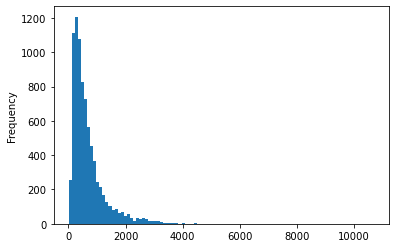

In [10]:
# 文の長さを固定するため
print(df.context_.str.split().str.len().describe())
df.context_.str.split().str.len().plot.hist(bins=100)

In [11]:
print(df.title_.str.split().str.len().describe())

count    8107.000000
mean       18.769335
std         5.783181
min         4.000000
25%        15.000000
50%        18.000000
75%        22.000000
max        51.000000
Name: title_, dtype: float64


In [12]:
context = df.context_.values
title = df.title_.apply(lambda x: "<BOS> " + x + " <EOS>").values
context.shape, title.shape

((8107,), (8107,))

In [13]:
context[0]

'お笑いトリオ ・ 安田大サーカス の クロちゃん ( 44 ) の 所属事務所 ・ 松竹芸能 は 19日 、 クロちゃん が 新型コロナウイルス に 感染 し た こと を 報告 し た 。 【 写真 】 1回目 の ワクチン 接種 後 に は … 体温計 の 写真 とともに 経過 を 報告 し た 団長安田 サイト で は 「 7月18日 夜 の 仕事 前 、 体調 に 違和感 と 悪寒 を 感じ た ため 、 体温 計測 し た ところ 37.5度 あり 、 発熱 外来 を 受診 、 新型コロナウイルス PCR検査 を 受け た 結果 、 同日 深夜 に 陽性 と 診断 さ れ まし た 」 と 説明 。 「 今後 は 保健所 の 指示 に従い 適切 に 対処 し て まいり ます 」 と し た 。 今月15日 に は 、 団長安田 ( 47 ) の 新型コロナウイルス 感染 を 公表 。 「 先日 感染 を ご 報告 さ せ て いただき まし た 、 団長安田 と は 直近 で の 接触 は なく 、 保健所 から も 濃厚接触者 に は 認定 さ れ て い ない 為 、 別 ルート で の 感染 と 考え られ ます 」 と 伝え 「 この 度 は 仕事 関係者 ・ 共演者 の 皆様 、 いつも 応援 し て 下さっ て いる 皆様 に 多大 なる ご 迷惑 と ご 心配 を お 掛け し て いる こと を 、 心より お詫び 申し上げ ます 」 と 記し た 。 最後 は 「 弊社 は 引き続き 、 行政機関 、 医療機関 の 指導 の もと 、 体調管理 の 徹底 、 所属 タレント および 社員 、 関係 各位 へ の 感染 防止 を 優先 し 、 新型コロナウイルス の 感染予防 、 拡大防止 対策 を 徹底 し て まいり ます 」 と コメント し て いる 。 \n'

In [14]:
title[0]

'<BOS> 安田大サーカス ・ クロちゃん 、 新型 コロナ感染 団長安田 と は 「 別 ルート で の 感染 と 考え られ ます 」 \n <EOS>'

In [15]:
keras_tokenizer = pp.text.Tokenizer(filters="", lower=False, oov_token="<UNK>")
keras_tokenizer.fit_on_texts(context.tolist()+title.tolist())

In [16]:
len(keras_tokenizer.word_index)

127218

In [17]:
X = keras_tokenizer.texts_to_sequences(context.tolist())
y = keras_tokenizer.texts_to_sequences(title.tolist())

In [18]:
[keras_tokenizer.index_word[idx] for idx in X[0][0:10]], "->" , [keras_tokenizer.index_word[idx] for idx in y[0][0:10]]

(['お笑いトリオ', '・', '安田大サーカス', 'の', 'クロちゃん', '(', '44', ')', 'の', '所属事務所'],
 '->',
 ['<BOS>', '安田大サーカス', '・', 'クロちゃん', '、', '新型', 'コロナ感染', '団長安田', 'と', 'は'])

In [19]:
X = pp.sequence.pad_sequences(X, maxlen=400, padding="post", truncating="post")
y = pp.sequence.pad_sequences(y, maxlen=401, padding="post", truncating="post")

In [20]:
encoder_inputs_X = X
decoder_inputs_Y = y[:,:-1]
decoder_outputs_Y = y[:,1:]
print(encoder_inputs_X.shape, decoder_inputs_Y.shape, decoder_outputs_Y.shape)

(8107, 400) (8107, 400) (8107, 400)


In [21]:
encoder_inputs_X[0]

array([22983,    32, 30662,     2, 13463,    25,  5716,    28,     2,
        3362,    32, 59765,     8,  1750,     3, 13463,     7,   468,
           5,   380,    13,    10,    21,     6,   517,    13,    10,
           4,    98,   116,    84,  2875,     2,   193,   213,   121,
           5,     8,    49, 37386,     2,   116,   634,  3542,     6,
         517,    13,    10, 26111,  1005,    11,     8,    14,  6488,
         748,     2,   162,   119,     3,  2247,     5,  2481,    12,
       49522,     6,   142,    10,    70,     3,  4140,  7397,    13,
          10,   143, 37387,    45,     3,  4545, 21638,     6,  6755,
           3,   468,  3527,     6,   190,    10,   236,     3,  2157,
        1910,     5,  1534,    12,  2547,    29,    27,    38,    10,
          15,    12,   306,     4,    14,   347,     8,  5799,     2,
        1938, 12346,  2515,     5,  3328,    13,     9,  6568,    19,
          15,    12,    13,    10,     4, 28176,     5,     8,     3,
       26111,    25,

In [22]:
decoder_outputs_Y[0]

array([30662,    32, 13463,     3,   566,  5155, 26111,    12,     8,
          14,   348,  4108,    11,     2,   380,    12,   148,    65,
          19,    15,    35,    58,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [23]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, mask=None):
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, tf.newaxis, :], dtype="int32")
        attention_output = self.attention(
            query=inputs, value=inputs, key=inputs, attention_mask=padding_mask
        )
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)


class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super(PositionalEmbedding, self).__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)


class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, latent_dim, num_heads, **kwargs):
        super(TransformerDecoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.latent_dim = latent_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(latent_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)

        attention_output_1 = self.attention_1(
            query=inputs, value=inputs, key=inputs, attention_mask=causal_mask
        )
        out_1 = self.layernorm_1(inputs + attention_output_1)

        attention_output_2 = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        out_2 = self.layernorm_2(out_1 + attention_output_2)

        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(out_2 + proj_output)

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)],
            axis=0,
        )
        return tf.tile(mask, mult)


In [24]:
embed_dim = 64
latent_dim = 64
num_heads = 2
vocab_size = len(keras_tokenizer.word_index) + 1

encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="encoder_inputs")
x = PositionalEmbedding(400, vocab_size, embed_dim)(encoder_inputs)
encoder_outputs = TransformerEncoder(embed_dim, latent_dim, num_heads)(x)
encoder = keras.Model(encoder_inputs, encoder_outputs)

decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="decoder_inputs")
encoded_seq_inputs = keras.Input(shape=(None, embed_dim), name="decoder_state_inputs")
x = PositionalEmbedding(400, vocab_size, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, encoded_seq_inputs)
x = layers.Dropout(0.5)(x)
decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)
decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs)

decoder_outputs = decoder([decoder_inputs, encoder_outputs])
transformer = keras.Model(
    [encoder_inputs, decoder_inputs], decoder_outputs, name="transformer"
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

In [25]:
transformer.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_inputs (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
positional_embedding (Positiona (None, None, 64)     8167616     encoder_inputs[0][0]             
__________________________________________________________________________________________________
decoder_inputs (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
transformer_encoder (Transforme (None, None, 64)     41792       positional_embedding[0][0]       
________________________________________________________________________________________

In [26]:
transformer.compile(
    "rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [ ]:
transformer.fit(x=(encoder_inputs_X, decoder_inputs_Y), y=decoder_outputs_Y, batch_size=64, epochs=10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-07-27 20:53:48.186441: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-27 20:53:48.186650: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz
2021-07-27 20:53:48.863565: I tensorflow/compiler/tf2mlcompute/kernels/mlc_subgraph_op.cc:326] Compute: Failed in processing TensorFlow graph transformer/positional_embedding/MLCSubgraphOp_0_13 with frame_id = 0 and iter_id = 0 with error: Invalid argument: Incompatible shapes: [64,400,64] vs. [1,400] (error will be reported 5 times unless TF_MLC_LOGGING=1).
2021-07-27 20:53:48.863565: I tensorflow/compiler/tf2mlcompute/kernels/mlc_subgraph_op.cc:326] Compute: Failed in processing TensorFlow graph transformer/model_1/positional_embedding_1/MLCSubgraphOp_0_14 with frame_id = 0 and iter_id = 0 with error: Invalid argument: Incompatible shapes: [64,400,64] vs. [1,400] (error will be reported 5 times unless TF_MLC_LOG

In [71]:
transformer.fit?

Signature:
transformer.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose=1,
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
Docstring:
Trains the model for a fixed number of epochs (iterations on a dataset).

Arguments:
    x: Input data. It could be:
      - A Numpy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
      - A TensorFlow tensor, or a list of tensors
        (in case the model has multiple inputs).
      - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
      - A `tf.data` dataset. Should return a tuple
        of either `(inputs, targets)` or
        `(inputs, target